In [89]:
import pandas as pd
pd.set_option('display.max_columns', 55)
import random
import numpy as np

from pathlib import Path

%matplotlib inline

import plotly.express as px
import plotly.figure_factory as ff
pd.set_option('display.max_columns', 127)
pd.set_option('display.max_rows', 127)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import re
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [192]:
X_test =  pd.read_csv(r'Test_KNN_Imputed.csv')
X_train =  pd.read_csv(r'Train_KNN_Imputed.csv')

In [193]:
X_test.shape

(34216, 107)

In [194]:
X_train.shape

(365929, 122)

In [200]:
df1 = X_train[X_train.columns.drop(list(X_train.filter(regex='FINAL_MAKE')))]

In [212]:
df1.shape

(365929, 22)

In [204]:
df1.columns

Index(['Unnamed: 0', 'FINAL_CYL', 'CAR_AGE', 'GVW_TYPE', 'GVWR', 'ENGINE_SIZE',
       'VEHICLE_TYPE', 'OBD_MIL_STATUS', 'FINAL_YEAR', 'ODOMETER',
       'AVG_MIL_YEARLY', 'TRANS_TYPE_A', 'TRANS_TYPE_M', 'FUEL_TYPE_A',
       'FUEL_TYPE_B', 'FUEL_TYPE_G', 'FUEL_TYPE_L', 'FUEL_TYPE_N',
       'FUEL_TYPE_P', 'FUEL_TYPE_X', 'DUAL_EXHAUST_N', 'DUAL_EXHAUST_Y',
       'OVERALL_RESULT'],
      dtype='object')

In [211]:
df1 = df1.drop(columns='FUEL_TYPE_P')

In [205]:
df2 = X_test[X_test.columns.drop(list(X_test.filter(regex='FINAL_MAKE')))]

In [213]:
df2.shape

(34216, 22)

In [207]:
df2.columns

Index(['Unnamed: 0', 'FINAL_CYL', 'CAR_AGE', 'GVW_TYPE', 'GVWR', 'ENGINE_SIZE',
       'VEHICLE_TYPE', 'OBD_MIL_STATUS', 'FINAL_YEAR', 'ODOMETER',
       'AVG_MIL_YEARLY', 'TRANS_TYPE_A', 'TRANS_TYPE_M', 'FUEL_TYPE_A',
       'FUEL_TYPE_B', 'FUEL_TYPE_G', 'FUEL_TYPE_L', 'FUEL_TYPE_N',
       'FUEL_TYPE_X', 'DUAL_EXHAUST_N', 'DUAL_EXHAUST_Y', 'OVERALL_RESULT'],
      dtype='object')

In [51]:
X_train.head()

OVERALL_RESULT  FINAL_CYL  CAR_AGE  GVW_TYPE    GVWR  ENGINE_SIZE  \
0             0.0        6.0     13.0       1.0  4250.0       3500.0   
1             0.0        4.0      4.0       1.0  4850.0       2400.0   
2             0.0        4.0      4.0       1.0  4795.0       2400.0   
3             0.0        4.0      5.0       1.0  3125.0       2000.0   
4             0.0        4.0      2.0       1.0  3820.0       1800.0   

   VEHICLE_TYPE  OBD_MIL_STATUS  FINAL_YEAR  ODOMETER  AVG_MIL_YEARLY  \
0           1.0             1.0      2004.0  156735.0     9472.070175   
1           4.0             1.0      2015.0   24885.0     8295.000000   
2           4.0             1.0      2016.0   54689.0    18229.666667   
3           1.0             1.0      2013.0   35883.0     8970.750000   
4           1.0             1.0      2017.0   37641.0    37641.000000   

   TRANS_TYPE_A  TRANS_TYPE_M  FUEL_TYPE_A  FUEL_TYPE_B  FUEL_TYPE_G  \
0           1.0           0.0          0.0          0.0          1.0   
1           1.0           0.0          0.0          0.0          1.0   
2           1.0           0.0          0.0          0.0          1.0   
3           1.0           0.0          0.0          0.0          1.0   
4           1.0           0.0          0.0          0.0          1.0   

   FUEL_TYPE_L  FUEL_TYPE_N  FUEL_TYPE_X  DUAL_EXHAUST_N  DUAL_EXHAUST_Y  \
0          0.0          0.0          0.0             1.0             0.0   
1          0.0          0.0          0.0             1.0             0.0   
2          0.0          0.0          0.0             1.0             0.0   
3          0.0          0.0          0.0             1.0             0.0   
4          0.0          0.0          0.0             1.0             0.0   

   FINAL_MAKE_Acura  FINAL_MAKE_Alfa  FINAL_MAKE_Alfa Romeo  FINAL_MAKE_Audi  \
0               0.0              0.0                    0.0              0.0   
1               0.0              0.0                    0.0              0.0   
2               0.0              0.0                    0.0              0.0   
3               0.0              0.0                    0.0              0.0   
4               0.0              0.0                    0.0              0.0   

   FINAL_MAKE_Auto Alliance International  FINAL_MAKE_BMW  FINAL_MAKE_BMW M  \
0                                     0.0             0.0               0.0   
1                                     0.0             0.0               0.0   
2                                     0.0             0.0               0.0   
3                                     0.0             0.0               0.0   
4                                     0.0             0.0               0.0   

   FINAL_MAKE_Bentley  FINAL_MAKE_Buick  FINAL_MAKE_Buick China  \
0                 0.0               0.0                     0.0   
1                 0.0               0.0                     0.0   
2                 0.0               0.0                     0.0   
3                 0.0               0.0                     0.0   
4                 0.0               0.0                     0.0   

   FINAL_MAKE_CAMI  FINAL_MAKE_Cadillac  FINAL_MAKE_Chevrolet  \
0              0.0                  0.0                   0.0   
1              0.0                  0.0                   0.0   
2              0.0                  0.0                   0.0   
3              0.0                  0.0                   0.0   
4              0.0                  0.0                   0.0   

   FINAL_MAKE_Chevrolet Australia  FINAL_MAKE_Chevrolet Canada  \
0                             0.0                          0.0   
1                             0.0                          0.0   
2                             0.0                          0.0   
3                             0.0                          0.0   
4                             0.0                          0.0   

   FINAL_MAKE_Chevrolet Mexico  FINAL_MAKE_Chevrolet USA  FINAL_MAKE_Chrysler  \
0            

In [187]:
X_test.shape

(365929, 122)

In [52]:
X_test.head()

OVERALL_RESULT  FINAL_CYL  CAR_AGE  GVW_TYPE    GVWR  ENGINE_SIZE  \
0             0.0        6.0     10.0       1.0  5580.0       4000.0   
1             0.0        4.0      5.0       1.0  3750.0       2500.0   
2             0.0        8.0      9.0       2.0  6800.0       5700.0   
3             0.0        4.0      3.0       1.0  4497.0       2400.0   
4             0.0        6.0     12.0       1.0  5100.0       3400.0   

   VEHICLE_TYPE  OBD_MIL_STATUS  FINAL_YEAR  ODOMETER  AVG_MIL_YEARLY  \
0           4.0             1.0      2005.0   64642.0     7182.444444   
1           1.0             1.0      2013.0   14197.0     3549.250000   
2           3.0             1.0      2012.0  166440.0    14094.208893   
3           1.0             1.0      2017.0   48821.0    24410.500000   
4           3.0             1.0      2004.0  117094.0    10644.909091   

   TRANS_TYPE_A  TRANS_TYPE_M  FUEL_TYPE_A  FUEL_TYPE_B  FUEL_TYPE_G  \
0           1.0           0.0          0.0          0.0          1.0   
1           1.0           0.0          0.0          0.0          0.0   
2           1.0           0.0          0.0          0.0          1.0   
3           1.0           0.0          0.0          0.0          1.0   
4           0.0           1.0          0.0          0.0          1.0   

   FUEL_TYPE_L  FUEL_TYPE_N  FUEL_TYPE_P  FUEL_TYPE_X  DUAL_EXHAUST_N  \
0          0.0          0.0          0.0          0.0             1.0   
1          0.0          0.0          0.0          1.0             1.0   
2          0.0          0.0          0.0          0.0             1.0   
3          0.0          0.0          0.0          0.0             1.0   
4          0.0          0.0          0.0          0.0             1.0   

   DUAL_EXHAUST_Y  FINAL_MAKE_Acura  FINAL_MAKE_Alfa  FINAL_MAKE_Alfa Romeo  \
0             0.0               0.0              0.0                    0.0   
1             0.0               0.0              0.0                    0.0   
2             0.0               0.0              0.0                    0.0   
3             0.0               0.0              0.0                    0.0   
4             0.0               0.0              0.0                    0.0   

   FINAL_MAKE_Aston Martin Lagonda Limited  FINAL_MAKE_Audi  \
0                                      0.0              0.0   
1                                      0.0              0.0   
2                                      0.0              0.0   
3                                      0.0              0.0   
4                                      0.0              0.0   

   FINAL_MAKE_Auto Alliance International  FINAL_MAKE_BMW  FINAL_MAKE_BMW M  \
0                                     0.0             0.0               0.0   
1                                     0.0             0.0               0.0   
2                                     0.0             0.0               0.0   
3                                     0.0             0.0               0.0   
4                                     0.0             0.0               0.0   

   FINAL_MAKE_Bentley  FINAL_MAKE_Buick  FINAL_MAKE_Buick China  \
0                 0.0               0.0                     0.0   
1                 0.0               0.0                     0.0   
2                 0.0               0.0                     0.0   
3                 0.0               0.0                     0.0   
4                 0.0               0.0                     0.0   

   FINAL_MAKE_CAMI  FINAL_MAKE_Cadillac  FINAL_MAKE_Chevrolet  \
0              0.0                  0.0                   0.0   
1              0.0                  0.0                   0.0   
2              0.0                  0.0                   0.0   
3              0.0                  0.0                   0.0   
4              0.0                  0.0                   0.0   

   FINAL_MAKE_Chevrolet Australia  FINAL_MAKE_Chevrolet Canada  \
0                             0.0                          0.0   
1   

In [93]:
df = X_train.columns.intersection(X_test.columns)

In [94]:
df

Index(['OVERALL_RESULT', 'FINAL_CYL', 'CAR_AGE', 'GVW_TYPE', 'GVWR',
       'ENGINE_SIZE', 'VEHICLE_TYPE', 'OBD_MIL_STATUS', 'FINAL_YEAR',
       'ODOMETER',
       ...
       'FINAL_MAKE_Suzuki Canada', 'FINAL_MAKE_Toyota',
       'FINAL_MAKE_Toyota Mexico', 'FINAL_MAKE_UnsupportedBrand',
       'FINAL_MAKE_Volkswagen', 'FINAL_MAKE_Volkswagen Commercial Vehicles',
       'FINAL_MAKE_Volkswagen Trucks', 'FINAL_MAKE_Volvo',
       'FINAL_MAKE_Volvo Cars', 'FINAL_MAKE_Volvo China'],
      dtype='object', length=113)

In [113]:
X_test.shape

(91483, 113)

In [95]:
X_train = X_train[df]

In [98]:
X_test.shape

(91483, 115)

In [114]:
X_train.shape

(682024, 113)

In [101]:
X_test.head()FINAL_MAKE_Chrysler Mexico, FINAL_MAKE_Chrysler Mexico, FINAL_MAKE_SAIC General Motors

OVERALL_RESULT  FINAL_CYL   CAR_AGE  GVW_TYPE    GVWR  ENGINE_SIZE  \
0             0.0   0.500000  0.382353       0.0  0.4250     0.376623   
1             0.0   0.333333  0.117647       0.0  0.4850     0.233766   
2             0.0   0.333333  0.117647       0.0  0.4795     0.233766   
3             0.0   0.333333  0.147059       0.0  0.3125     0.181818   
4             0.0   0.333333  0.058824       0.0  0.3820     0.155844   

   VEHICLE_TYPE  OBD_MIL_STATUS  FINAL_YEAR  ODOMETER  AVG_MIL_YEARLY  \
0           0.0             1.0    0.500000  0.203371        0.497933   
1           0.5             1.0    0.823529  0.032289        0.497800   
2           0.5             1.0    0.852941  0.070961        0.498923   
3           0.0             1.0    0.764706  0.046560        0.497876   
4           0.0             1.0    0.882353  0.048841        0.501117   

   TRANS_TYPE_A  TRANS_TYPE_M  FUEL_TYPE_A  FUEL_TYPE_B  FUEL_TYPE_G  \
0           1.0           0.0          0.0          0.0          1.0   
1           1.0           0.0          0.0          0.0          1.0   
2           1.0           0.0          0.0          0.0          1.0   
3           1.0           0.0          0.0          0.0          1.0   
4           1.0           0.0          0.0          0.0          1.0   

   FUEL_TYPE_L  FUEL_TYPE_N  FUEL_TYPE_X  DUAL_EXHAUST_N  DUAL_EXHAUST_Y  \
0          0.0          0.0          0.0             1.0             0.0   
1          0.0          0.0          0.0             1.0             0.0   
2          0.0          0.0          0.0             1.0             0.0   
3          0.0          0.0          0.0             1.0             0.0   
4          0.0          0.0          0.0             1.0             0.0   

   FINAL_MAKE_Acura  FINAL_MAKE_Alfa  FINAL_MAKE_Alfa Romeo  FINAL_MAKE_Audi  \
0               0.0              0.0                    0.0              0.0   
1               0.0              0.0                    0.0              0.0   
2               0.0              0.0                    0.0              0.0   
3               0.0              0.0                    0.0              0.0   
4               0.0              0.0                    0.0              0.0   

   FINAL_MAKE_Auto Alliance International  FINAL_MAKE_BMW  FINAL_MAKE_BMW M  \
0                                     0.0             0.0               0.0   
1                                     0.0             0.0               0.0   
2                                     0.0             0.0               0.0   
3                                     0.0             0.0               0.0   
4                                     0.0             0.0               0.0   

   FINAL_MAKE_Bentley  FINAL_MAKE_Buick  FINAL_MAKE_Buick China  \
0                 0.0               0.0                     0.0   
1                 0.0               0.0                     0.0   
2                 0.0               0.0                     0.0   
3                 0.0               0.0                     0.0   
4                 0.0               0.0                     0.0   

   FINAL_MAKE_CAMI  FINAL_MAKE_Cadillac  FINAL_MAKE_Chevrolet  \
0              0.0                  0.0                   0.0   
1              0.0                  0.0                   0.0   
2              0.0                  0.0                   0.0   
3              0.0                  0.0                   0.0   
4              0.0                  0.0                   0.0   

   FINAL_MAKE_Chevrolet Australia  FINAL_MAKE_Chevrolet Canada  \
0                             0.0                          0.0   
1                             0.0                          0.0   
2                             0.0                          0.0   
3                             0.0                          0.0   
4                             0.0                          0.0   

   FINAL_MAKE_Chevrolet Mexico  FINAL_MAKE_Chevrolet USA  FINAL_MAKE_Chrysler  \
0      

In [108]:
X_test['FINAL_MAKE_SAIC General Motors']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
91478    0.0
91479    0.0
91480    0.0
91481    0.0
91482    0.0
Name: FINAL_MAKE_SAIC General Motors, Length: 91483, dtype: float64

In [109]:
X_test.groupby('FINAL_MAKE_SAIC General Motors').count()

OVERALL_RESULT  FINAL_CYL  CAR_AGE  GVW_TYPE  \
FINAL_MAKE_SAIC General Motors                                                 
0.0                                      91482      91482    91482     91482   
1.0                                          1          1        1         1   

                                 GVWR  ENGINE_SIZE  VEHICLE_TYPE  \
FINAL_MAKE_SAIC General Motors                                     
0.0                             91482        91482         91482   
1.0                                 1            1             1   

                                OBD_MIL_STATUS  FINAL_YEAR  ODOMETER  \
FINAL_MAKE_SAIC General Motors                                         
0.0                                      91482       91482     91482   
1.0                                          1           1         1   

                                AVG_MIL_YEARLY  TRANS_TYPE_A  TRANS_TYPE_M  \
FINAL_MAKE_SAIC General Motors                                               
0.0                                      91482         91482         91482   
1.0                                          1             1             1   

                                FUEL_TYPE_A  FUEL_TYPE_B  FUEL_TYPE_G  \
FINAL_MAKE_SAIC General Motors                                          
0.0                                   91482        91482        91482   
1.0                                       1            1            1   

                                FUEL_TYPE_L  FUEL_TYPE_N  FUEL_TYPE_X  \
FINAL_MAKE_SAIC General Motors                                          
0.0                                   91482        91482        91482   
1.0                                       1            1            1   

                                DUAL_EXHAUST_N  DUAL_EXHAUST_Y  \
FINAL_MAKE_SAIC General Motors                                   
0.0                                      91482           91482   
1.0                                          1               1   

                                FINAL_MAKE_Acura  FINAL_MAKE_Alfa  \
FINAL_MAKE_SAIC General Motors                                      
0.0                                        91482            91482   
1.0                                            1                1   

                                FINAL_MAKE_Alfa Romeo  FINAL_MAKE_Audi  \
FINAL_MAKE_SAIC General Motors                                           
0.0                                             91482            91482   
1.0                                                 1                1   

                                FINAL_MAKE_Auto Alliance International  \
FINAL_MAKE_SAIC General Motors                                           
0.0                                                              91482   
1.0                                                                  1   

                                FINAL_MAKE_BMW  FINAL_MAKE_BMW M  \
FINAL_MAKE_SAIC General Motors                                     
0.0                                      91482             91482   
1.0                                          1                 1   

                                FINAL_MAKE_Bentley  FINAL_MAKE_Buick  \
FINAL_MAKE_SAIC General Motors                                         
0.0                                          91482             91482   
1.0                                              1                 1   

                                FINAL_MAKE_Buick China  FINAL_MAKE_CAMI  \
FINAL_MAKE_SAIC General Motors                                            
0.0                                              91482            91482   
1.0                                                  1                1   

                                FINAL_MAKE_Cadillac  FINAL_MAKE_Chevrolet  \
FINAL_MAKE_SAIC General Motors                                              
0.0                                           91482                 91482   
1.0                 

In [111]:
X_test = X_test.drop(columns = 'FINAL_MAKE_SAIC General Motors')

In [153]:
#X_train['FINAL_MAKE_SAIC General Motors']

In [102]:
X_train.head()

OVERALL_RESULT  FINAL_CYL   CAR_AGE  GVW_TYPE    GVWR  ENGINE_SIZE  \
0             0.0      0.375  0.294118       0.0  0.5580       0.4375   
1             0.0      0.250  0.147059       0.0  0.3750       0.2500   
2             0.0      0.500  0.264706       0.5  0.6800       0.6500   
3             0.0      0.250  0.088235       0.0  0.4497       0.2375   
4             0.0      0.375  0.352941       0.0  0.5100       0.3625   

   VEHICLE_TYPE  OBD_MIL_STATUS  FINAL_YEAR  ODOMETER  AVG_MIL_YEARLY  \
0      0.500000             1.0    0.529412  0.086186        0.515485   
1      0.000000             1.0    0.764706  0.018929        0.515365   
2      0.333333             1.0    0.735294  0.221911        0.515713   
3      0.000000             1.0    0.882353  0.065092        0.516053   
4      0.333333             1.0    0.500000  0.156119        0.515599   

   TRANS_TYPE_A  TRANS_TYPE_M  FUEL_TYPE_A  FUEL_TYPE_B  FUEL_TYPE_G  \
0           1.0           0.0          0.0          0.0          1.0   
1           1.0           0.0          0.0          0.0          0.0   
2           1.0           0.0          0.0          0.0          1.0   
3           1.0           0.0          0.0          0.0          1.0   
4           0.0           1.0          0.0          0.0          1.0   

   FUEL_TYPE_L  FUEL_TYPE_N  FUEL_TYPE_X  DUAL_EXHAUST_N  DUAL_EXHAUST_Y  \
0          0.0          0.0          0.0             1.0             0.0   
1          0.0          0.0          1.0             1.0             0.0   
2          0.0          0.0          0.0             1.0             0.0   
3          0.0          0.0          0.0             1.0             0.0   
4          0.0          0.0          0.0             1.0             0.0   

   FINAL_MAKE_Acura  FINAL_MAKE_Alfa  FINAL_MAKE_Alfa Romeo  FINAL_MAKE_Audi  \
0               0.0              0.0                    0.0              0.0   
1               0.0              0.0                    0.0              0.0   
2               0.0              0.0                    0.0              0.0   
3               0.0              0.0                    0.0              0.0   
4               0.0              0.0                    0.0              0.0   

   FINAL_MAKE_Auto Alliance International  FINAL_MAKE_BMW  FINAL_MAKE_BMW M  \
0                                     0.0             0.0               0.0   
1                                     0.0             0.0               0.0   
2                                     0.0             0.0               0.0   
3                                     0.0             0.0               0.0   
4                                     0.0             0.0               0.0   

   FINAL_MAKE_Bentley  FINAL_MAKE_Buick  FINAL_MAKE_Buick China  \
0                 0.0               0.0                     0.0   
1                 0.0               0.0                     0.0   
2                 0.0               0.0                     0.0   
3                 0.0               0.0                     0.0   
4                 0.0               0.0                     0.0   

   FINAL_MAKE_CAMI  FINAL_MAKE_Cadillac  FINAL_MAKE_Chevrolet  \
0              0.0                  0.0                   0.0   
1              0.0                  0.0                   0.0   
2              0.0                  0.0                   0.0   
3              0.0                  0.0                   0.0   
4              0.0                  0.0                   0.0   

   FINAL_MAKE_Chevrolet Australia  FINAL_MAKE_Chevrolet Canada  \
0                             0.0                          0.0   
1                             0.0                          0.0   
2                             0.0                          0.0   
3                             0.0                          0.0   
4                             0.0                          0.0   

   FINAL_MAKE_Chevrolet Mexico  FINAL_MAKE_Chevrolet USA  FINAL_MAKE_Chrysler  \
0      

In [118]:
y_train = X_train['OVERALL_RESULT']
X_train = X_train.drop('OVERALL_RESULT', axis='columns')

In [119]:
X_train.shape

(682024, 112)

In [120]:
y_train.shape

(682024,)

In [122]:
X_test.shape

(91483, 112)

In [123]:
y_test.shape

(91483,)

In [121]:
y_test = X_test['OVERALL_RESULT']
X_test = X_test.drop('OVERALL_RESULT', axis='columns')

In [124]:
from sklearn.metrics import plot_confusion_matrix
# define a random forest classifier function
def test_model(X_train,X_test,y_train,y_test):
    lg = LogisticRegression(random_state=42)
    lg.fit(X_train,y_train)
    y_pred = lg.predict(X_test)
    print('Train data accuracy:' + str(lg.score(X_train, y_train)))
    print('Test data accuracy:' + str(lg.score(X_test, y_test)))
    print('Precision: ' + str(precision_score(y_test, y_pred)))
    print('Recall: ' + str(recall_score(y_test, y_pred)))
    print('F1_score: ' + str(f1_score(y_test, y_pred)))
    print('\n')
    print(classification_report(y_test,y_pred))
    plot_confusion_matrix(lg, X_test, y_test)

Train data accuracy:0.7776925738683683
Test data accuracy:0.86178852901632
Precision: 0.2816095867093348
Recall: 0.6639910097929042
F1_score: 0.3954867087397208


              precision    recall  f1-score   support

         0.0       0.97      0.88      0.92     85254
         1.0       0.28      0.66      0.40      6229

    accuracy                           0.86     91483
   macro avg       0.63      0.77      0.66     91483
weighted avg       0.93      0.86      0.89     91483



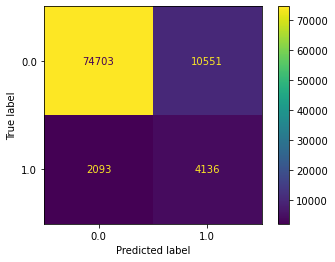

In [125]:
test_model(X_train,X_test,y_train,y_test)

###### Odometer Only

In [126]:
#X_train,X_test,y_train,y_test

In [136]:
X_train_o = X_train[['ODOMETER']]

In [137]:
X_test_o = X_test[['ODOMETER']]

Train data accuracy:0.6413762565540215
Test data accuracy:0.6656646590076845
Precision: 0.11995631143704166
Recall: 0.617113501364585
F1_score: 0.2008674295866646


              precision    recall  f1-score   support

         0.0       0.96      0.67      0.79     85254
         1.0       0.12      0.62      0.20      6229

    accuracy                           0.67     91483
   macro avg       0.54      0.64      0.49     91483
weighted avg       0.90      0.67      0.75     91483



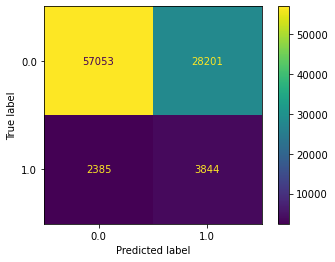

In [140]:
test_model(X_train_o,X_test_o,y_train,y_test)

##### Age Only

In [142]:
X_train_age = X_train[['CAR_AGE']]
X_test_age = X_test[['CAR_AGE']]

Train data accuracy:0.6514961350333712
Test data accuracy:0.633276127805166
Precision: 0.11736694677871148
Recall: 0.6726601380638947
F1_score: 0.19986167091988835


              precision    recall  f1-score   support

         0.0       0.96      0.63      0.76     85254
         1.0       0.12      0.67      0.20      6229

    accuracy                           0.63     91483
   macro avg       0.54      0.65      0.48     91483
weighted avg       0.91      0.63      0.72     91483



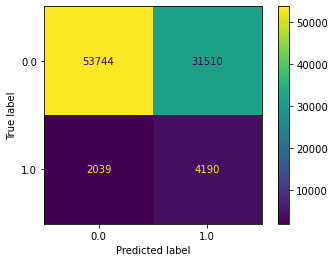

In [143]:
test_model(X_train_age,X_test_age,y_train,y_test)

### Odometer - Age 

In [146]:
X_train_oa = X_train[['ODOMETER', 'CAR_AGE']]
X_test_oa = X_test[['ODOMETER', 'CAR_AGE']]

Train data accuracy:0.6603286687858492
Test data accuracy:0.653979427871845
Precision: 0.12343009478672985
Recall: 0.6689677315781024
F1_score: 0.20840731201080298


              precision    recall  f1-score   support

         0.0       0.96      0.65      0.78     85254
         1.0       0.12      0.67      0.21      6229

    accuracy                           0.65     91483
   macro avg       0.54      0.66      0.49     91483
weighted avg       0.91      0.65      0.74     91483



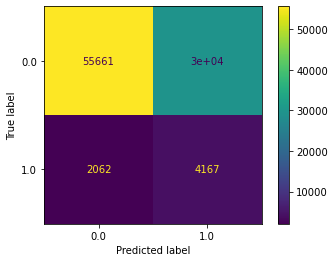

In [147]:
test_model(X_train_oa,X_test_oa,y_train,y_test)

#### Age, Odometer, GVW Type

In [180]:
X_train_oag = X_train[['ODOMETER', 'CAR_AGE','GVW_TYPE']]
X_test_oag = X_test[['ODOMETER', 'CAR_AGE','GVW_TYPE']]

Train data accuracy:0.6604298382461614
Test data accuracy:0.6541433927614967
Precision: 0.1235965042215968
Recall: 0.6697704286402312
F1_score: 0.20868347338935575


              precision    recall  f1-score   support

         0.0       0.96      0.65      0.78     85254
         1.0       0.12      0.67      0.21      6229

    accuracy                           0.65     91483
   macro avg       0.54      0.66      0.49     91483
weighted avg       0.91      0.65      0.74     91483



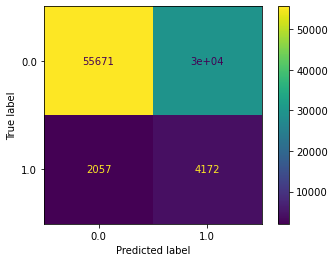

In [181]:
test_model(X_train_oag,X_test_oag,y_train,y_test)

#### Age, Odometer, GVW Type, ENGINE_SIZE

In [150]:
X_train_oage = X_train[['ODOMETER', 'CAR_AGE','GVW_TYPE', 'ENGINE_SIZE']]
X_test_oage = X_test[['ODOMETER', 'CAR_AGE','GVW_TYPE', 'ENGINE_SIZE']]

Train data accuracy:0.6607875969174105
Test data accuracy:0.6525146748576238
Precision: 0.123342175066313
Recall: 0.6718574410017659
F1_score: 0.20842152444034961


              precision    recall  f1-score   support

         0.0       0.96      0.65      0.78     85254
         1.0       0.12      0.67      0.21      6229

    accuracy                           0.65     91483
   macro avg       0.54      0.66      0.49     91483
weighted avg       0.91      0.65      0.74     91483



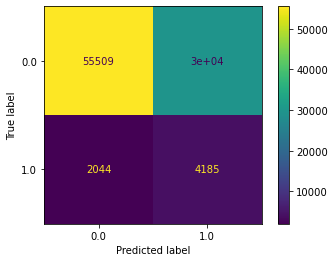

In [152]:
test_model(X_train_oage,X_test_oage,y_train,y_test)

#### Age, Odometer, GVW Type, ENGINE_SIZE, TRANS_TYPE_A,	TRANS_TYPE_M

In [168]:
X_train_oaget = X_train[['ODOMETER', 'CAR_AGE','GVW_TYPE', 'ENGINE_SIZE',\
                        'TRANS_TYPE_A','TRANS_TYPE_M']]
X_test_oaget = X_test[['ODOMETER', 'CAR_AGE','GVW_TYPE', 'ENGINE_SIZE',\
                      'TRANS_TYPE_A','TRANS_TYPE_M']]

Train data accuracy:0.6607010896977232
Test data accuracy:0.6541324617688532
Precision: 0.12348130148758371
Recall: 0.6689677315781024
F1_score: 0.20848030018761726


              precision    recall  f1-score   support

         0.0       0.96      0.65      0.78     85254
         1.0       0.12      0.67      0.21      6229

    accuracy                           0.65     91483
   macro avg       0.54      0.66      0.49     91483
weighted avg       0.91      0.65      0.74     91483



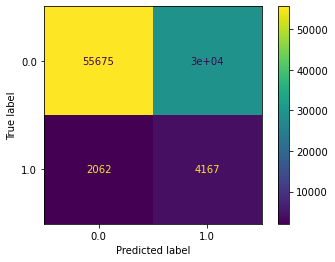

In [169]:
test_model(X_train_oage,X_test_oage,y_train,y_test)

##### Age, Odometer, GVW Type, ENGINE_SIZE, TRANS_TYPE, FUEL_TYPE

In [174]:

####FUEL_TYPE_A	FUEL_TYPE_B	FUEL_TYPE_G	FUEL_TYPE_L	FUEL_TYPE_N	FUEL_TYPE_P	FUEL_TYPE_X
X_train_fuel = X_train[['ODOMETER', 'CAR_AGE','GVW_TYPE', 'ENGINE_SIZE',\
                        'TRANS_TYPE_A','TRANS_TYPE_M', 'FUEL_TYPE_A',\
                         'FUEL_TYPE_B', 'FUEL_TYPE_G', 'FUEL_TYPE_L',\
                         'FUEL_TYPE_N',  'FUEL_TYPE_X']]
X_test_fuel = X_test[['ODOMETER', 'CAR_AGE','GVW_TYPE', 'ENGINE_SIZE',\
                        'TRANS_TYPE_A','TRANS_TYPE_M', 'FUEL_TYPE_A',\
                         'FUEL_TYPE_B', 'FUEL_TYPE_G', 'FUEL_TYPE_L',\
                         'FUEL_TYPE_N', 'FUEL_TYPE_X']]

Train data accuracy:0.6607553399880356
Test data accuracy:0.6528972596001443
Precision: 0.12320273980691447
Recall: 0.669930968052657
F1_score: 0.2081296758104738


              precision    recall  f1-score   support

         0.0       0.96      0.65      0.78     85254
         1.0       0.12      0.67      0.21      6229

    accuracy                           0.65     91483
   macro avg       0.54      0.66      0.49     91483
weighted avg       0.91      0.65      0.74     91483



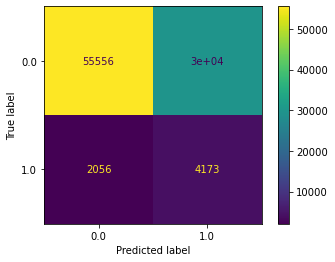

In [176]:
test_model(X_train_fuel,X_test_fuel,y_train,y_test)

##### Age, Odometer, GVW Type, ENGINE_SIZE, TRANS_TYPE, FUEL_TYPE, VEHICLE_TYPE

In [177]:
X_train_vec = X_train[['ODOMETER', 'CAR_AGE','GVW_TYPE', 'ENGINE_SIZE',\
                        'TRANS_TYPE_A','TRANS_TYPE_M', 'FUEL_TYPE_A',\
                         'FUEL_TYPE_B', 'FUEL_TYPE_G', 'FUEL_TYPE_L',\
                         'FUEL_TYPE_N',  'FUEL_TYPE_X', 'VEHICLE_TYPE']]
X_test_vec = X_test[['ODOMETER', 'CAR_AGE','GVW_TYPE', 'ENGINE_SIZE',\
                        'TRANS_TYPE_A','TRANS_TYPE_M', 'FUEL_TYPE_A',\
                         'FUEL_TYPE_B', 'FUEL_TYPE_G', 'FUEL_TYPE_L',\
                         'FUEL_TYPE_N', 'FUEL_TYPE_X', 'VEHICLE_TYPE']]

Train data accuracy:0.6610720443855348
Test data accuracy:0.6530612244897959
Precision: 0.12339081138537852
Recall: 0.6708942045272114
F1_score: 0.20844452203406738


              precision    recall  f1-score   support

         0.0       0.96      0.65      0.78     85254
         1.0       0.12      0.67      0.21      6229

    accuracy                           0.65     91483
   macro avg       0.54      0.66      0.49     91483
weighted avg       0.91      0.65      0.74     91483



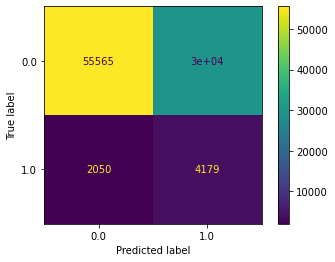

In [179]:
test_model(X_train_vec,X_test_vec,y_train,y_test)